Closed-form solution (Normal Equation):
  Intercept (b0): 2.6908
  Slope     (b1): 4.1318

Gradient Descent (after 1000 iterations):
  Intercept (b0): 2.6908
  Slope     (b1): 4.1318
  Final MSE: 0.9958


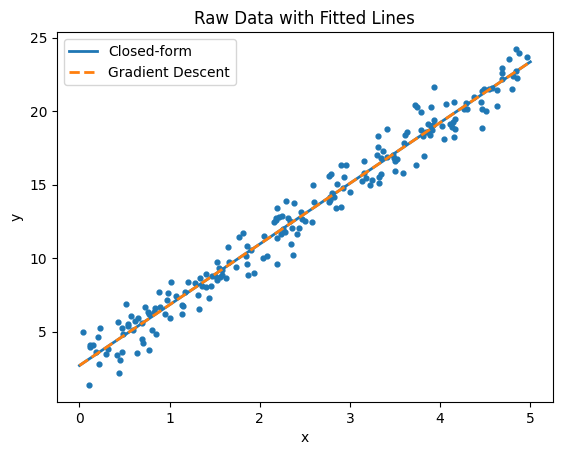

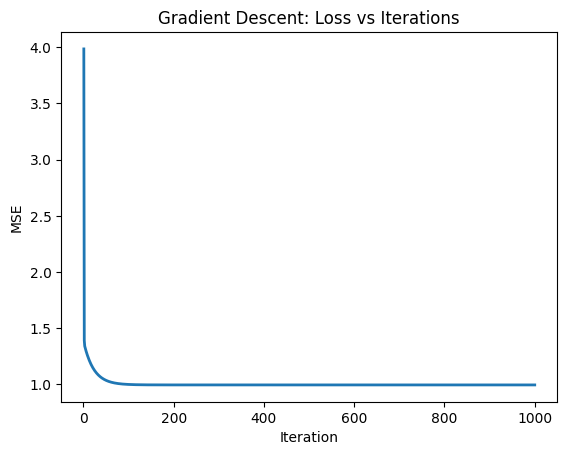

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
rng = np.random.default_rng(42)

# 1) Generate synthetic data: y = 3 + 4x + noise
n = 200
x = rng.uniform(0, 5, n)
noise = rng.normal(0, 1.0, n)  # Gaussian noise
y = 3 + 4 * x + noise

# Add bias column for closed-form and GD
X = np.c_[np.ones_like(x), x]  # shape (n,2)

# 2) Closed-form (Normal Equation): theta = (X^T X)^(-1) X^T y
theta_closed = np.linalg.inv(X.T @ X) @ (X.T @ y)

# 3) Gradient Descent
eta = 0.05
iters = 1000
theta_gd = np.zeros(2)
losses = []

def mse(theta):
    yhat = X @ theta
    return np.mean((y - yhat) ** 2)

for t in range(iters):
    yhat = X @ theta_gd
    grad = -(2 / n) * (X.T @ (y - yhat))  # gradient of MSE
    theta_gd -= eta * grad
    losses.append(mse(theta_gd))

# Print results
print("Closed-form solution (Normal Equation):")
print(f"  Intercept (b0): {theta_closed[0]:.4f}")
print(f"  Slope     (b1): {theta_closed[1]:.4f}\n")

print("Gradient Descent (after 1000 iterations):")
print(f"  Intercept (b0): {theta_gd[0]:.4f}")
print(f"  Slope     (b1): {theta_gd[1]:.4f}")
print(f"  Final MSE: {losses[-1]:.4f}")

# 4) Plot raw data + fitted lines
plt.figure()
plt.scatter(x, y, s=12)
x_line = np.linspace(0, 5, 100)
y_closed = theta_closed[0] + theta_closed[1] * x_line
y_gd = theta_gd[0] + theta_gd[1] * x_line
plt.plot(x_line, y_closed, linewidth=2, label="Closed-form")
plt.plot(x_line, y_gd, linewidth=2, linestyle="--", label="Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Raw Data with Fitted Lines")
plt.legend()
plt.show()

# 5) Plot loss vs iterations for GD
plt.figure()
plt.plot(range(1, iters + 1), losses, linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Gradient Descent: Loss vs Iterations")
plt.show()
